In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv("encoded_car_data (1).csv")
data.head()
df = pd.get_dummies(data, drop_first=True)

In [3]:
X = data.drop('price',axis=1)
y = data['price']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)


scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5)
}

results ={}

for name,model in models.items():
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('regressor', model)
    ])

In [6]:
pipeline.fit(X_train,y_train)
pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test,pred)

results[name] = {'MSE' : mse, 'MAE' : mae, 'Rscore': r2}

print("Name: PRARTHANA D")
print("Reg. No: 21225230213")
for model_name, metrics in results.items():
    print(f"{model_name} - \nMean Squared Error: {metrics['MSE']:.2f}, \nMean Absolute Error: {metrics['MAE']:.2f}, \nR Squared Score: {metrics['Rscore']:.2f}")

Name: PRARTHANA D
Reg. No: 21225230213
ElasticNet - 
Mean Squared Error: 0.63, 
Mean Absolute Error: 0.59, 
R Squared Score: 0.49


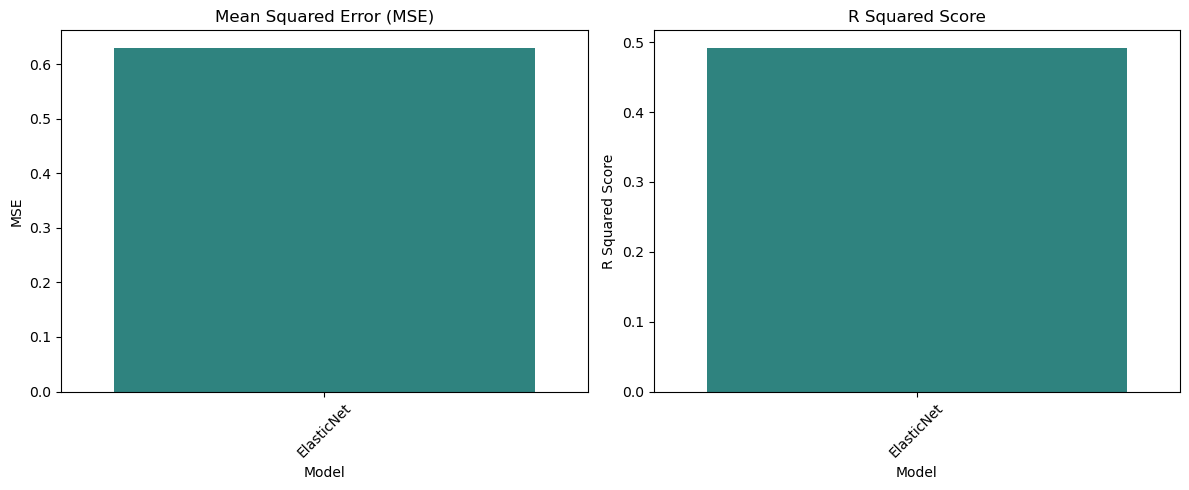

In [10]:
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'},inplace=True)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x='Model',y='MSE',data=results_df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x='Model',y='Rscore', data=results_df,palette='viridis')
plt.title('R Squared Score')
plt.ylabel('R Squared Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()